<a href="https://colab.research.google.com/github/RoseMwangi98/Moringa-school-projects/blob/main/Moringa_DataScience_Core_W2_Core_Independent_Project_2021_03_Rose_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

IMPORTING THE LIBRARIES THAT ARE GOING TO BE USED.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
#from factor_analyzer import FactorAnalyzer

IMPORT OUR DATASET

In [2]:
#Dataset: http://bit.ly/FinancialDataset
df=pd.read_csv("http://bit.ly/FinancialDataset")
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [3]:
definitions=pd.read_csv("http://bit.ly/VariableDefinitions ")
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


TIDYING THE DATA

In [ ]:
#checking for null values
np.count_nonzero(df.isnull())

267

In [ ]:
#remove null values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#drop missing values
df.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# checking for duplicates
df.duplicated().sum()

0

REMOVING OUTLIERS AND ANOMALIES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


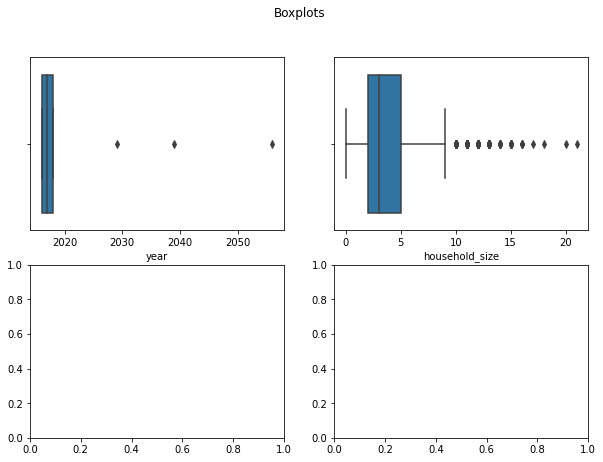

In [ ]:
# Checking for Outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['year'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
#sns.boxplot(df['Respondant Age'], ax=ax3)
plt.show()

In [ ]:

#checking for anomalies
q1_year = df['year'].quantile(.25)
q3_year = df['year'].quantile(.75)

iqr_year = q3_year - q1_year


q1_size = df['household_size'].quantile(.25)
q3_size = df['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

q1_age= df['Respondent Age'].quantile(.25)
q3_age = df['Respondent Age'].quantile(.75)

q1_3, q3_3 = np.percentile(df['year'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_year - (1.5*iqr)
u_bound = q3_year + (1.5 * iqr)

print(iqr_year, iqr)

2.0 2.0


EXPLANATORY OF THE DATA
UNIVARAIATE ANALYSIS OF NUMERICAL DATA.

In [ ]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


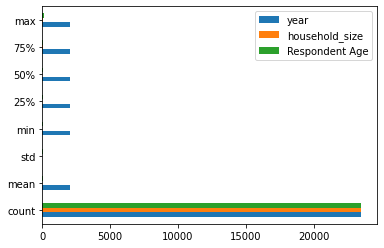

In [ ]:
df.describe(). plot.barh()

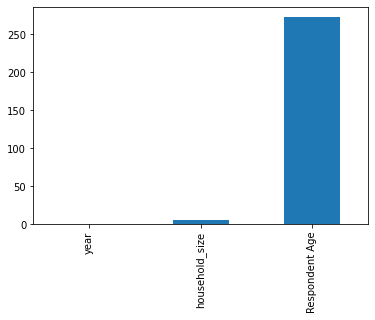

In [ ]:
df.var().plot.bar()

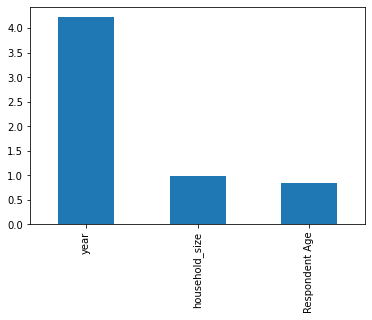

In [ ]:
df.skew().plot.bar()

In [ ]:
df.kurtosis()

year              165.195071
household_size      1.158154
Respondent Age      0.101108
dtype: float64

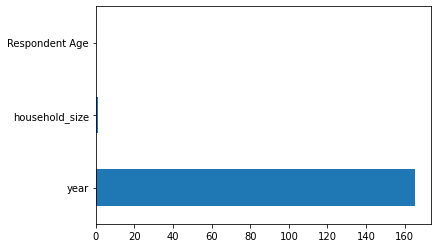

In [ ]:
df.kurtosis().plot.barh()

This distribution has skew 0.8418012375387167
This distribution has kurtosis 0.10110811880734305


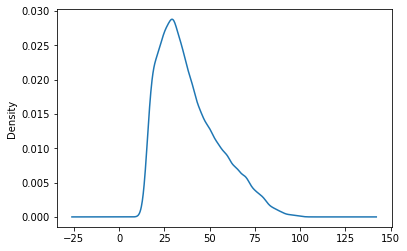

In [ ]:
df['Respondent Age'].plot(kind='density')
print('This distribution has skew', df['Respondent Age'].skew())
print('This distribution has kurtosis', df['Respondent Age'].kurt())

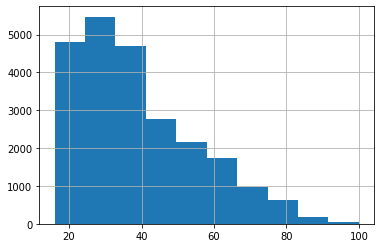

In [ ]:
df['Respondent Age'].hist()

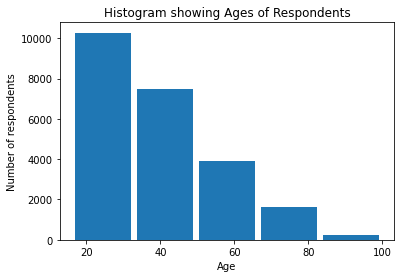

In [ ]:
df1 =df['Respondent Age']
plt.hist(df1, bins=5, histtype='bar', rwidth=0.9)

plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Histogram showing Ages of Respondents') 
plt.show()

UNIVARIATE ANALYSIS:CATEGORICAL DATA

In [ ]:
df['gender_of_respondent'].value_counts()

Female    13859
Male       9631
Name: gender_of_respondent, dtype: int64

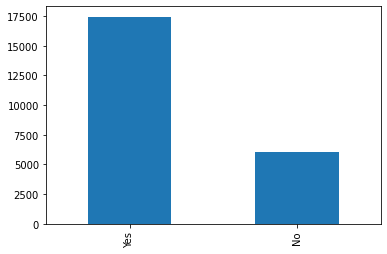

In [ ]:
df['Cell Phone Access'].value_counts().plot.bar()

In [ ]:
df['Has a Bank account'].value_counts()

No     20179
Yes     3309
Name: Has a Bank account, dtype: int64

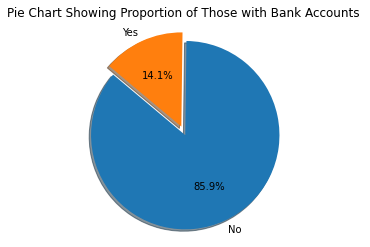

In [ ]:
plt.pie(df['Has a Bank account'].value_counts() , explode = explode ,labels = ('No','Yes'), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Those with Bank Accounts ')
plt.show()


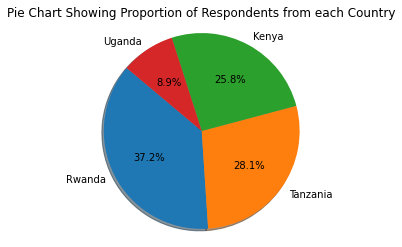

In [ ]:
plt.pie(df['country'].value_counts() ,labels=['Rwanda','Tanzania','Kenya','Uganda'],autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Respondents from each Country')
plt.show()

In [ ]:
df['Type of Job'].value_counts()

Self employed                   6428
Informally employed             5587
Farming and Fishing             5433
Remittance Dependent            2524
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: Type of Job, dtype: int64

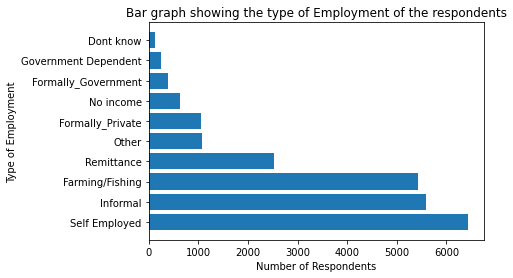

In [ ]:
labels=['Self Employed','Informal','Farming/Fishing','Remittance','Other','Formally_Private','No income','Formally_Government','Government Dependent','Dont know']
plt.barh(labels , df['Type of Job'].value_counts())
plt.ylabel("Type of Employment")
plt.xlabel("Number of Respondents")
plt.title("Bar graph showing the type of Employment of the respondents")
plt.show()

BIVARIATE ANALYSIS OF THE DATA

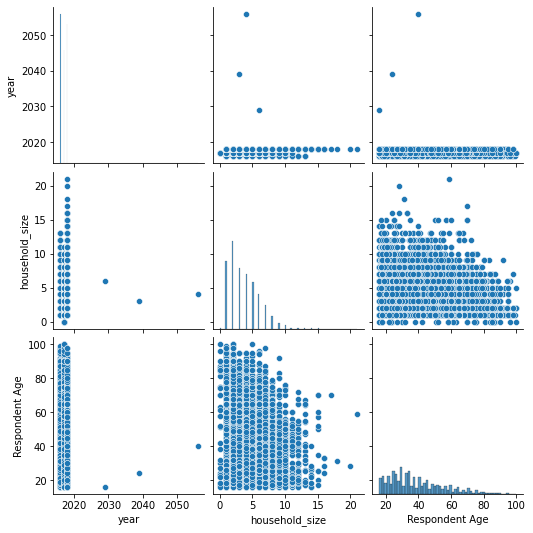

In [ ]:

## Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

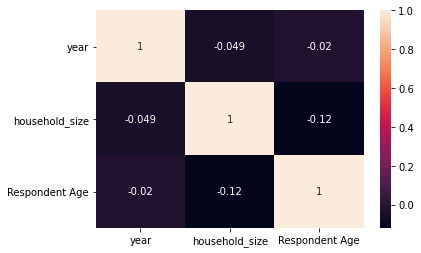

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

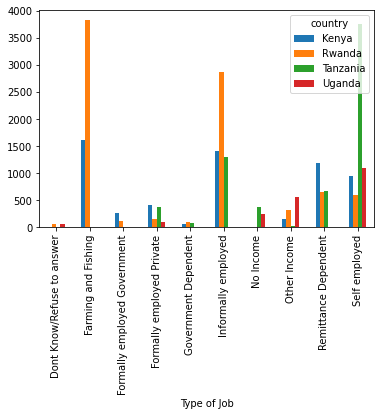

In [ ]:
countries = df.groupby(['country','Type of Job'])['Type of Job'].count().unstack('country')
countries.plot.bar()


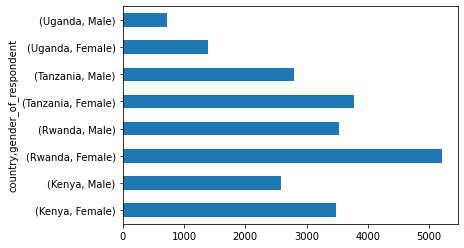

In [ ]:
#plt.title('Gender by country')
df1=df.groupby('country')['gender_of_respondent'].value_counts()
df1.plot.barh()


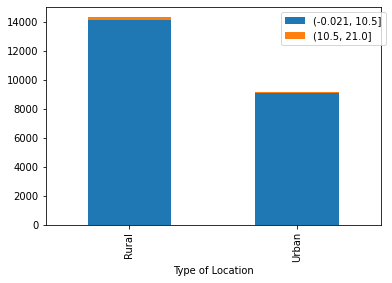

In [ ]:
df['Household'] = pd.cut(x=df['household_size'], bins=2)
household = df.groupby(['Type of Location','Household'])['Type of Location'].count().unstack('Household')
ax = household.plot.bar(stacked=True, edgecolor='none',)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

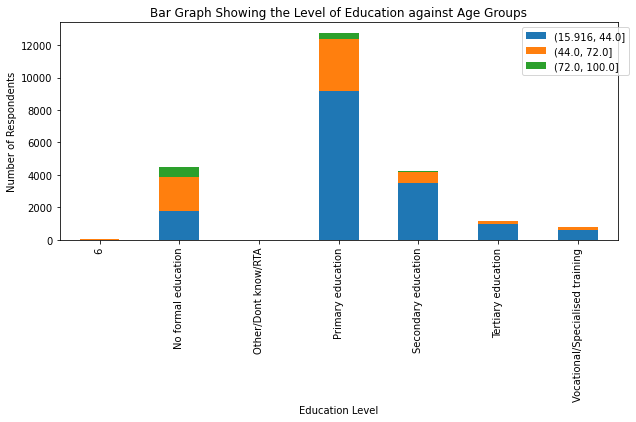

In [ ]:
Education = df.groupby(['Level of Education','Marital_Status'])['Level of Education'].count().unstack('Marital_Status')

In [ ]:
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


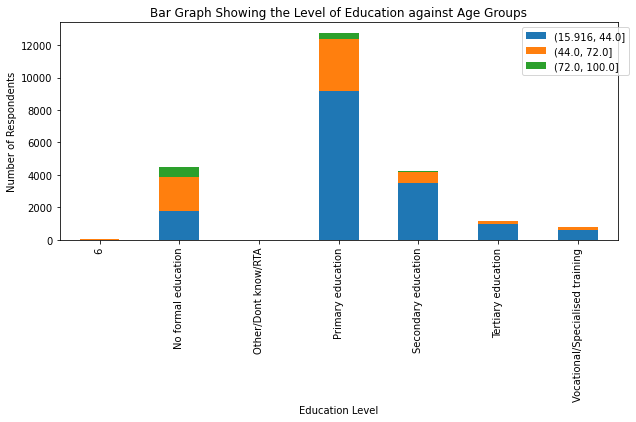

In [ ]:
df['Ages'] = pd.cut(x=df['Respondent Age'], bins=3)
Education = df.groupby(['Level of Educuation','Ages'])['Level of Educuation'].count().unstack('Ages')
ax = Education.plot.bar(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bar Graph Showing the Level of Education against Age Groups')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))


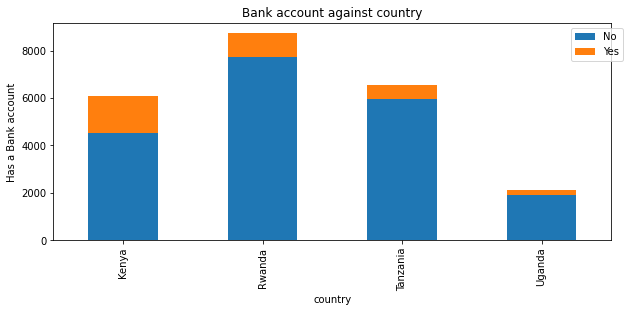

In [ ]:
df2 = df.groupby(['country','Has a Bank account'])['Has a Bank account'].count().unstack('Has a Bank account')
ax = df2.plot.bar(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bank account against country')
plt.xlabel('country')
plt.ylabel('Has a Bank account')
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))


In [ ]:
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Household,Ages
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,"(-0.021, 10.5]","(15.916, 44.0]"
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,"(-0.021, 10.5]","(44.0, 72.0]"
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,"(-0.021, 10.5]","(15.916, 44.0]"


In [ ]:
df["country"] = df["country"].astype('category').cat.codes
df["Type of Location"] = df["Type of Location"].astype('category').cat.codes
df["Cell Phone Access"] = df["Cell Phone Access"].astype('category').cat.codes
df["gender_of_respondent"] = df["gender_of_respondent"].astype('category').cat.codes
df["The relathip with head"] = df["The relathip with head"].astype('category').cat.codes
df["Level of Educuation"] = df["Level of Educuation"].astype('category').cat.codes
df["Type of Job"] = df["Type of Job"].astype('category').cat.codes
df["marital_status"] = df["marital_status"].astype('category').cat.codes
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Household,Ages
0,1,2018,uniqueid_1,Yes,1,2,3.0,24.0,1,6,2,5,10,"(-0.021, 10.5]","(15.916, 44.0]"
1,1,2018,uniqueid_2,No,1,1,5.0,70.0,1,2,4,2,5,"(-0.021, 10.5]","(44.0, 72.0]"
2,1,2018,uniqueid_3,Yes,2,2,5.0,26.0,2,4,3,7,10,"(-0.021, 10.5]","(15.916, 44.0]"
3,1,2018,uniqueid_4,No,1,2,5.0,34.0,1,2,2,4,4,"(-0.021, 10.5]","(15.916, 44.0]"
4,1,2018,uniqueid_5,No,2,1,8.0,26.0,2,1,3,4,6,"(-0.021, 10.5]","(15.916, 44.0]"


In [ ]:
df.corr()

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.000000,-0.092625,0.148296,-0.149253,-0.158963,-0.058726,-0.028989,0.129311,0.006876,-0.049896,0.377380
year,-0.092625,1.000000,0.203674,-0.060470,-0.049344,-0.019570,0.001485,0.002345,-0.023259,0.169296,0.250768
Type of Location,0.148296,0.203674,1.000000,-0.078875,-0.272319,-0.047336,0.010669,0.016298,0.077646,0.125128,0.364500
Cell Phone Access,-0.149253,-0.060470,-0.078875,1.000000,0.100085,-0.103424,0.103003,-0.049033,-0.092928,0.248980,-0.147075
household_size,-0.158963,-0.049344,-0.272319,0.100085,1.000000,-0.119709,0.012909,0.088386,-0.109401,-0.006666,-0.180743
Respondent Age,-0.058726,-0.019570,-0.047336,-0.103424,-0.119709,1.000000,0.012614,-0.151236,0.220216,-0.351177,-0.102911
gender_of_respondent,-0.028989,0.001485,0.010669,0.103003,0.012909,0.012614,1.000000,-0.467862,-0.100356,0.117455,-0.031229
The relathip with head,0.129311,0.002345,0.016298,-0.049033,0.088386,-0.151236,-0.467862,1.000000,-0.139801,-0.018053,0.040724
marital_status,0.006876,-0.023259,0.077646,-0.092928,-0.109401,0.220216,-0.100356,-0.139801,1.000000,-0.115989,0.057607
Level of Educuation,-0.049896,0.169296,0.125128,0.248980,-0.006666,-0.351177,0.117455,-0.018053,-0.115989,1.000000,0.051277


In [22]:
df.drop(['uniqueid','Respondent Age','household_size'],axis=1,inplace=True)

In [24]:
#!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(-0.0, 0.0)

In [29]:
df.drop_duplicates(inplace=True)

MULTIVARIATE ANALYSIS:PCA

In [ ]:

X = df.drop(['uniqueid','Has a Bank account','Ages','Household'],axis=1)
y = df['Has a Bank account']

In [34]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:

explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3904 0]

[ 642 0]]

Accuracy 0.858776946766388

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred)

[[3904    0]

 [ 642    0]]

Accuracy 0.858776946766388


**MULTIVARIATE ANALYSIS:DISCRIMINANT ANALYSIS**




---



In [ ]:
X = df.drop(['uniqueid','Has a Bank account','Ages','Household'],axis=1)
y = df['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred))

[[7619  227]

 [ 944  302]]
 
Accuracy0.8712054553453585

**CHALLENGING THE SOLUTION:USING MCA TO MULTIVARIATE ANALYSIS**

In [46]:
%pip install --user prince
import site
site.main()
import prince
!pip install xgboost
!pip install plotly
%pip install --user mca
import mca
mca = prince.MCA()

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=5997 sha256=544aa7e994125481bdd123eb830551d8548446edd83b53e5044601ae0e6b7cf9
  Stored in directory: /root/.cache/pip/wheels/01/fb/ff/19d72d65c8bb01d4af40c9c2ca20fd267d1969b3b5f8dd60d6
Successfully built mca


In [48]:
df = pd.read_csv("http://bit.ly/FinancialDataset")

In [49]:
X.isnull().sum()
X.dropna(axis=0,inplace=True)

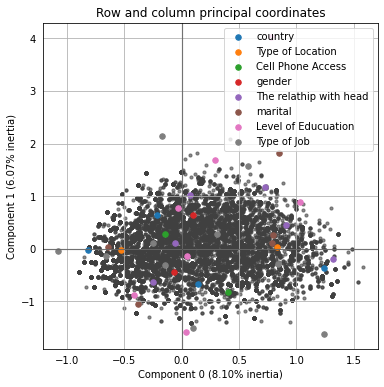

In [51]:
mca = prince.MCA(n_iter=3, copy=True, check_input=True, engine='auto', random_state=0)
mca = mca.fit(X)


x = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1)

**RECOMMENDATIONS**

The analysis should include more countries(the whole of africa)they should have more open ended questions for individuals to explain further.This provides more information to the analyst.